In [1]:
# Preparação de dados por Flávio Silvino
import pandas as pd
import numpy as np
import math

In [2]:
df = pd.read_csv('../datasets/dados-preparados-finais.csv', delimiter=',')

d:\github\ine5644-data-mining-projeto-final\venv\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,92) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,city,ibgeID,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,População alfabetizada,População não alfabetizada,SEM_NOT,...,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,ibge,média
0,Capinzal/SC,420390,8,1900,3.501.401,831.582.633,421.0,15154,879,35,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,420390,44.82118
1,Capinzal/SC,420390,8,1900,3.501.401,831.582.633,421.0,15154,879,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420390,44.82118
2,Capinzal/SC,420390,8,1900,3.501.401,831.582.633,421.0,15154,879,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420390,44.82118
3,Capinzal/SC,420390,8,1900,3.501.401,831.582.633,421.0,15154,879,35,...,NaN,NaN,1.0,NaN,07/08/2020,1.0,NaN,NaN,420390,44.82118
4,Capinzal/SC,420390,8,1900,3.501.401,831.582.633,421.0,15154,879,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420390,44.82118


In [4]:
for i, name in enumerate(df.columns.values):
    if i in (19,92):
        print(str(i) + ' - ' + name + ': ')
        print('dtype: ', df[name].dtype)
        print('Valores: ', end='')
        print(df[name].unique())
        print()

19 - CS_ETINIA: 
dtype:  object
Valores: [nan 'KAINGANG (CAINGANGUE)' 'GUARANI KAIOWA (PAI TAVYTERA)'
 'XOKLENG (SHOKLENG, XOCLENG)']

92 - DS_PCR_OUT: 
dtype:  object
Valores: [nan 'SARSCOV2 TR' 'COVID 19' 'COVID19' 'COVID-19' 'CORONAVIRUS']



In [5]:
df = df[['ID_MUNICIP','CO_MUN_NOT','deaths', 'média', 'TOSSE', 'DESC_RESP', 'FATOR_RISC']]

In [6]:
df[df['CO_MUN_NOT'] == 420390]

,ID_MUNICIP,CO_MUN_NOT,deaths,média,TOSSE,DESC_RESP,FATOR_RISC
0,CAPINZAL,420390,8,44.82118,1.0,0.0,0
1,CAPINZAL,420390,8,44.82118,1.0,0.0,1
2,CAPINZAL,420390,8,44.82118,1.0,0.0,0
3,CAPINZAL,420390,8,44.82118,1.0,1.0,0
4,CAPINZAL,420390,8,44.82118,0.0,1.0,1
5,CAPINZAL,420390,8,44.82118,0.0,0.0,0
6,CAPINZAL,420390,8,44.82118,0.0,0.0,1
7,CAPINZAL,420390,8,44.82118,1.0,0.0,1
8,CAPINZAL,420390,8,44.82118,1.0,0.0,1
9,CAPINZAL,420390,8,44.82118,1.0,0.0,1


In [8]:
df = df.groupby(['ID_MUNICIP','CO_MUN_NOT','deaths', 'média']).mean().reset_index()

In [9]:
df.head()

,ID_MUNICIP,CO_MUN_NOT,deaths,média,TOSSE,DESC_RESP,FATOR_RISC
0,ABELARDO LUZ,420010,5,60.622849,0.0,1.00,1.0
1,AGROLANDIA,420020,6,54.235967,1.0,0.00,0.0
2,ALFREDO WAGNER,420070,1,62.466040,0.5,0.75,0.5
3,ANGELINA,420090,0,60.710383,1.0,0.00,1.0
4,APIUNA,420125,3,59.503610,0.0,0.00,1.0


<AxesSubplot:xlabel='FATOR_RISC', ylabel='deaths'>

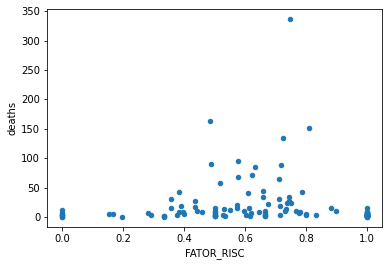

In [10]:
df.plot.scatter(x='FATOR_RISC', y='deaths')

<AxesSubplot:xlabel='média', ylabel='deaths'>

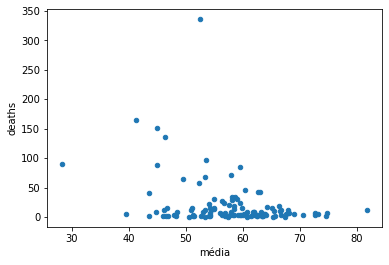

In [11]:
df.plot.scatter(x='média', y='deaths')

<AxesSubplot:xlabel='DESC_RESP', ylabel='deaths'>

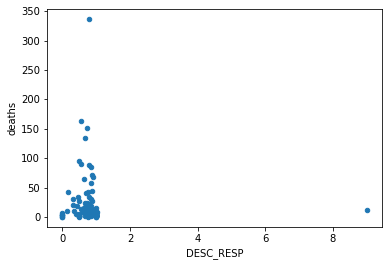

In [12]:
df.plot.scatter(x='DESC_RESP', y='deaths')

<AxesSubplot:xlabel='TOSSE', ylabel='deaths'>

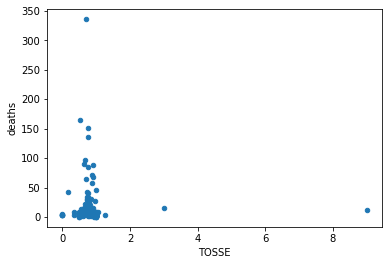

In [13]:
df.plot.scatter(x='TOSSE', y='deaths')

In [18]:
from sklearn.preprocessing import StandardScaler

X = df[['média','TOSSE','DESC_RESP','FATOR_RISC']]
# prepara a função para transformar os dados
scaler = StandardScaler().fit(X)
# realiza a padronização (média=0, variância = 1)
rescaledX = scaler.transform(X)

In [30]:
dfnorm = pd.DataFrame(rescaledX, columns=['média','TOSSE','DESC_RESP','FATOR_RISC'])
df['média'] = dfnorm['média']
df['TOSSE'] = dfnorm['TOSSE']
df['DESC_RESP'] = dfnorm['DESC_RESP']
df['FATOR_RISC'] = dfnorm['FATOR_RISC']

In [32]:
df.head()

,ID_MUNICIP,CO_MUN_NOT,deaths,média,TOSSE,DESC_RESP,FATOR_RISC
0,ABELARDO LUZ,420010,5,0.339350,-1.047190,0.234207,1.256421
1,AGROLANDIA,420020,6,-0.435880,0.166493,-1.000636,-2.284864
2,ALFREDO WAGNER,420070,1,0.563073,-0.440348,-0.074504,-0.514222
3,ANGELINA,420090,0,0.349974,0.166493,-1.000636,1.256421
4,APIUNA,420125,3,0.203498,-1.047190,-1.000636,1.256421


<AxesSubplot:xlabel='FATOR_RISC', ylabel='deaths'>

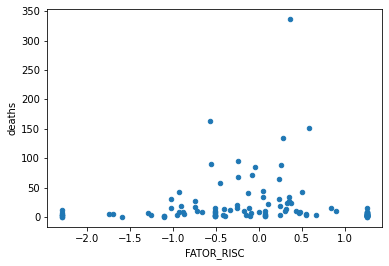

In [33]:
df.plot.scatter(x='FATOR_RISC', y='deaths')

<AxesSubplot:xlabel='TOSSE', ylabel='DESC_RESP'>

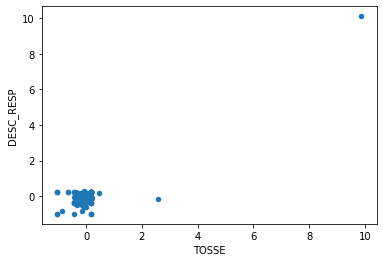

In [34]:
df.plot.scatter(x='TOSSE', y='DESC_RESP')